In [1]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sys
sys.path.append('../Codes/')
from models import *
from Epi_models import*
from functions import *
import networkx as nx
import matplotlib.animation as animation
import seaborn
def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
Text_files_path = '../../../../Dropbox/Research/Epidemiology_2020/Text_files/'

%autosave 60

Autosaving every 60 seconds


# Deterministic Model

12.002999750075354 11.999999999999998
t = 89.90
t = 89.90


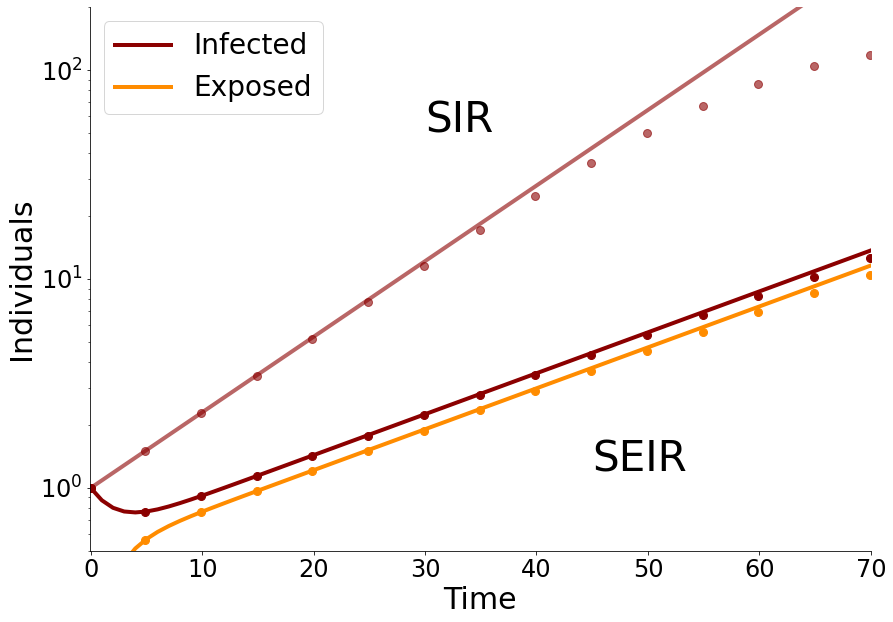

In [32]:
N = 2000
intervals = 100
p=1.0
gamma = 1/6
sigmas = [1/4, 1000]
R0 = 1.5 #use 1.5 and 4.0
beta = R0*gamma
T_total = 90 #use 65 and 12
intervals = T_total*2
repetitions = 200
lambda1 = ((-sigma-gamma)/(2)) + (1/2)*np.sqrt((sigma-gamma)**2 + 4*sigma*beta)
est = 1/(lambda1)
print(est, 1/(beta-gamma))
colors_status = ['indigo', 'darkred']

fig, ax = plt.subplots(figsize=(14,10))

for sigma in sigmas:
    if (sigma == 1/4):
        mymodel = SEIRSModel(initN = 2000, beta = beta, sigma = sigma, gamma = gamma, initI=1)
        mymodel.run(T = T_total)
        lambda1, lambda2, time, E_solution, I_solution, sol_total_approx, I_max_2 = run_deterministic(N, beta, sigma, gamma, p, T_total, folder = Text_files_path +'Deterministic/Single_trajectory')
        ax.plot(time, I_solution, color = 'darkred', ls = '-', lw = 4, label = 'Infected')
        ax.plot(time, E_solution, color = 'darkorange', ls = '-', lw = 4, label = 'Exposed')
        ax.plot(mymodel.tseries[::50], mymodel.numI[::50], color = 'darkred', marker = 'o', ls = '', lw = 4, ms = 8)
        ax.plot(mymodel.tseries[::50], mymodel.numE[::50], color = 'darkorange', marker = 'o', ls = '', lw = 4, ms = 8)
    if (sigma == 1000):
        mymodel = SEIRSModel(initN = 2000, beta = beta, sigma = sigma, gamma = gamma, initI=1)
        mymodel.run(T = T_total)
        lambda1, lambda2, time, E_solution, I_solution, sol_total_approx, I_max_2 = run_deterministic(N, beta, sigma, gamma, p, T_total, folder = Text_files_path +'Deterministic/Single_trajectory')
        ax.plot(time, I_solution, color = 'darkred', ls = '-', lw = 4, alpha = .6)
        ax.plot(mymodel.tseries[::50], mymodel.numI[::50], color = 'darkred', marker = 'o', ls = '', lw = 4, ms = 8, alpha = .6)
ax.text(x = 30, y = 50, s = 'SIR', fontsize = 42, color = 'black')
ax.text(x = 45, y = 1.2, s = 'SEIR', fontsize = 42, color = 'black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(bottom = .5, top = 2e2)
ax.set_xlim(-0.1, 70)
my_plot_layout(ax = ax, yscale = 'log', xlabel = 'Time', ylabel = 'Individuals', x_fontsize = 30, y_fontsize = 30)
ax.legend(fontsize = 28, loc = 2)
fig.savefig('../Figures/Deterministic/Figure_deterministic.pdf')


<Figure size 432x288 with 0 Axes>

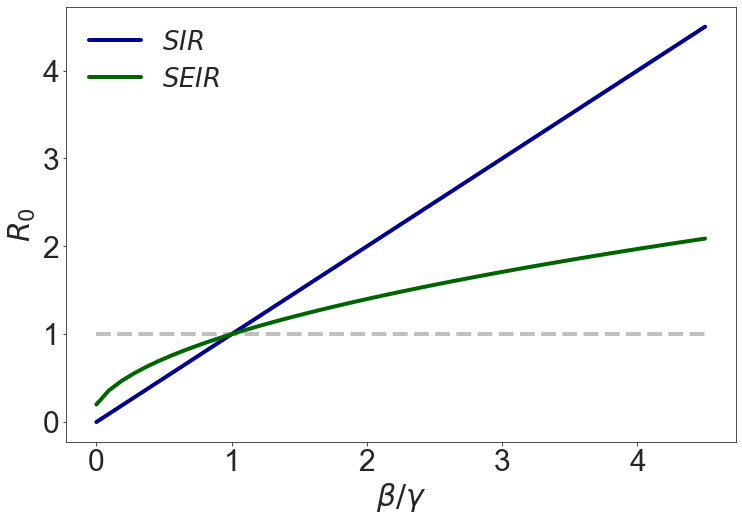

In [36]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(0, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, GT0, color='darkblue', label = '$SIR$', linewidth = 4)
ax.plot(beta/gamma, GT, color='darkgreen', label = '$SEIR$', linewidth = 4)
ax.hlines(1,0,4.5, linestyles='dashed', linewidth = 4, color = 'silver')
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'$R_0$', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/growth_rates.pdf')

<Figure size 432x288 with 0 Axes>

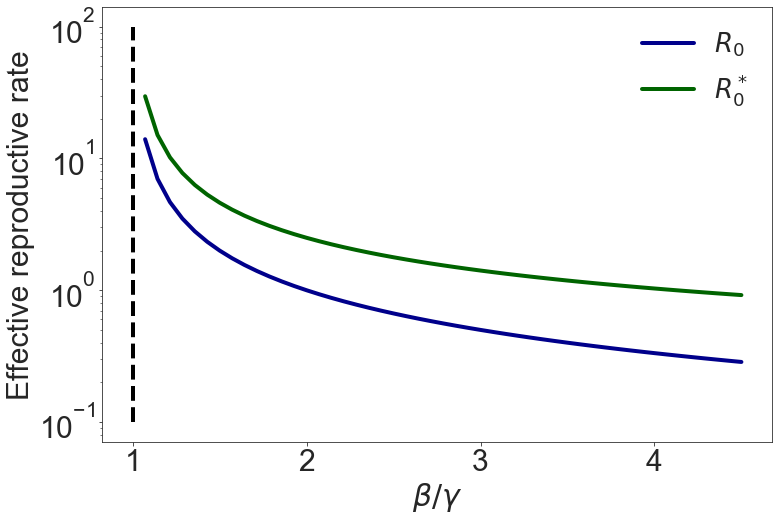

In [14]:
sigma = 1/4
gamma = 1/6
beta = np.linspace(1, 4.5)*gamma
GT0 = (((beta)/(gamma)))
GT = (np.sqrt(1-4*((sigma*gamma-sigma*beta)/(sigma+gamma)**2)))
seaborn.set_style('ticks')
seaborn.despine()
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(beta/gamma, 1/(GT0-1), color='darkblue', label = '$R_0$', linewidth = 4)
ax.plot(beta/gamma, 1/(GT-1), color='darkgreen', label = '$R_0^*$', linewidth = 4)
ax.vlines(1,0.1,100, linestyles='dashed', linewidth = 4)
ax.set_xlabel(r'$\beta/\gamma$', fontsize = 30)
ax.set_ylabel(r'Effective reproductive rate', fontsize = 30)
ax.tick_params('both', labelsize=30)
ax.set_yscale('log')
ax.legend(fontsize = 26, frameon=False)
fig.savefig('../Figures/Deterministic/establishment.pdf')

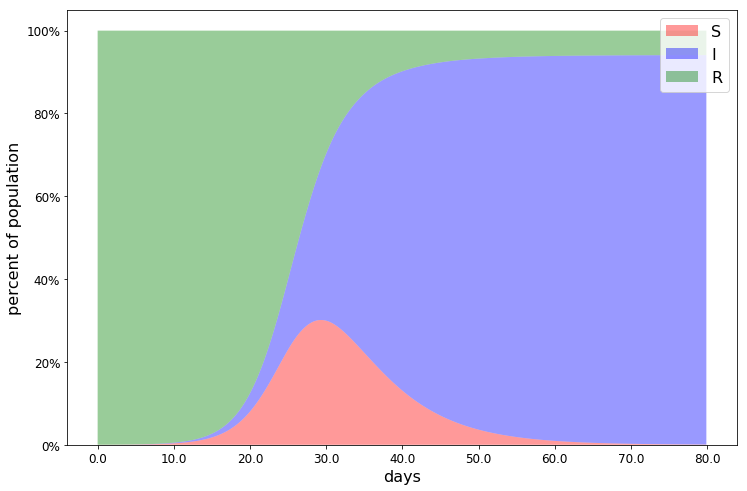

In [14]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_time = 80
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_time, dt= 0.1)
fig, ax = plt.subplots(figsize=(12,8))
ax.stackplot(t, np.array([n,R,S])/N,labels=['S','I', 'R'], colors = ['r', 'b', 'g'], alpha = 0.4)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()], size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel('days', fontsize = 16)
ax.set_ylabel('percent of population', fontsize = 16)
ax.legend(fontsize = 16)
fig.savefig('../Figures/Deterministic/example_epidemics.pdf')

In [17]:
#Run SIR model
N = 8000
n0 = 1
beta = 1/2
gamma = 1/6
T_total = 10 #use 25 for \beta = 1/4 and 10 for \beta = 1/2
model = EpiModel(N=N, I0=n0, beta=beta, gamma=gamma)
t, S, n, R = model.run(runtime=T_total, dt= 0.1)
I_max = n[-1]
print(I_max)

26.924094496148268


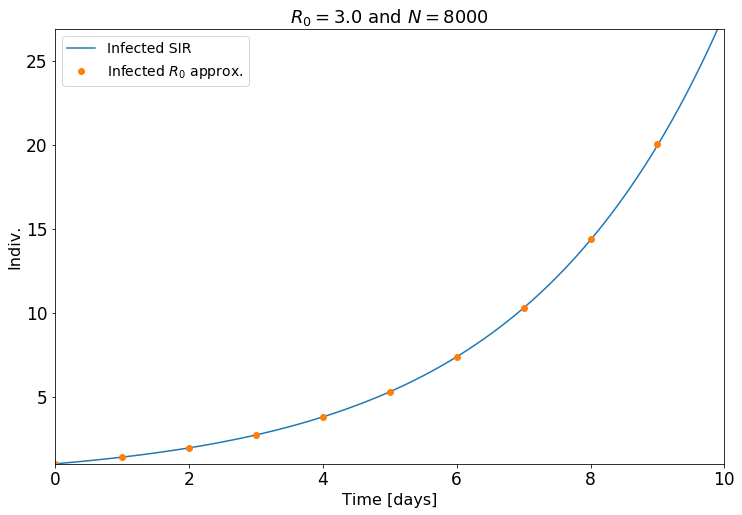

In [18]:
infec = np.array([1])
time_infec = np.array([0])
for i in range(int(T_total)):
    infec = np.append(infec,np.exp(((beta/gamma - 1)/6)*(i+1)))
    #time_infec = np.append(time_infec,time_infec[-1]+(6*np.log(2))/(2))
    time_infec = np.append(time_infec,time_infec[-1]+1)
fig, ax = plt.subplots(figsize=(12,8))
#ax.stackplot(t, [S,n,R],labels=['Susceptible','Infected', 'Recovered'])
#ax.plot(t, S, label = 'Susceptible')
ax.plot(t, n,'-', label='Infected SIR')
ax.plot(time_infec, infec,'.',ms = 12, label='Infected $R_0$ approx.')
ax.legend(fontsize=14)
ax.set_xlabel('Time [days]', fontsize = 16)
ax.set_ylabel('Indiv.', fontsize = 16)
ax.set_title(r'$R_0 = %.01f$ and $N = %.0f$'%(beta/gamma, N), fontsize = 18)
ax.tick_params(labelsize = 17)
plt.xlim(0,T_total)
plt.ylim(1,I_max)
#plt.yscale('log')
plt.savefig('../Figures/Deterministic/7_days_no_replacement/dynamics_R0%.1f_N%.0f.pdf'%(beta/gamma, N))

(<Figure size 864x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x181bf25cc0>)

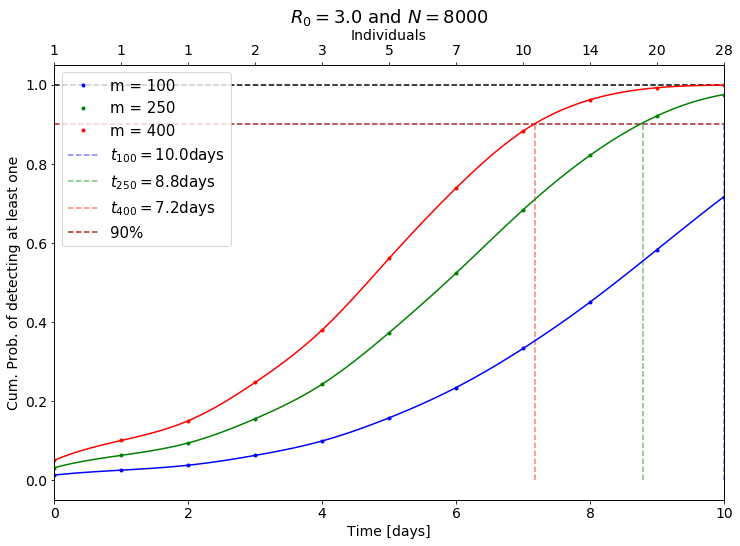

In [19]:
folder = '../Figures/Deterministic/7_days_no_replacement/'
sample_sizes = [100, 250, 400]
colors = ['b', 'g', 'r']
#plot_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)
plot_cum_prob_time(T_total, sample_sizes, beta/gamma, N, time_infec, infec, colors, folder = folder)
#plot_cum_prob_ind(I_max, sample_sizes, beta/gamma, N, time_infec, infec, colors)

In [25]:
a = 1